Next steps:
- [ ] Add legend
- [ ] Adjust positioning of the graph nodes. I.e., internal inputs (blue) at the top and key outputs (green) at the bottom
- [ ] [Code cleaning and robusting]...
- [ ] Jacques review
- [ ] [Some more code cleaning and robusting]...
- [ ] Add unit tests?

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from pathlib import Path
from core.trbs import TheResponsibleBusinessSimulator
import math 
import numpy as np

def determine_category(node):
    if node in input_dict["key_outputs"]:
        return "key_output"
    elif node in input_dict["internal_variable_inputs"]:
        return "internal_input"
    elif node in input_dict["external_variable_inputs"]:
        return "external_input"
    elif node in input_dict["fixed_inputs"]:
        return "fixed_input"
    else:
        return "intermediate"

def category_color(node):
    category_is = determine_category(node)
    if category_is == 'fixed_input':
        return 'yellow'
    elif category_is == 'external_input':
        return 'orange'
    elif category_is == 'internal_input':
        return 'blue'
    elif category_is == 'key_output':
        return 'green'
    else:
        # intermediaries and other unaccounted categories
        return 'grey' 

In [3]:
# Read the CSV file
data = pd.read_csv('data/toy/csv/dependencies.csv')

path = Path.cwd() / 'data'
file_format = 'xlsx'
name = 'toy'

case = TheResponsibleBusinessSimulator(path, file_format, name)
case.build()
data = pd.DataFrame({'argument_1': case.input_dict['argument_1'], 'operator': case.input_dict['operator'], 
              'argument_2': case.input_dict['argument_2'], 'destination': case.input_dict['destination']})
data

Creating 'toy'
Hierarchy calculated in 2 iterations


,argument_1,operator,argument_2,destination
0,investment in apples,*,% ROI apples,profit
1,investment in machinery,*,% ROI machinery,profit
2,investment in machinery,/,cost of machines,number of machines
3,number of machines,*,efficiency per machine,efficiency


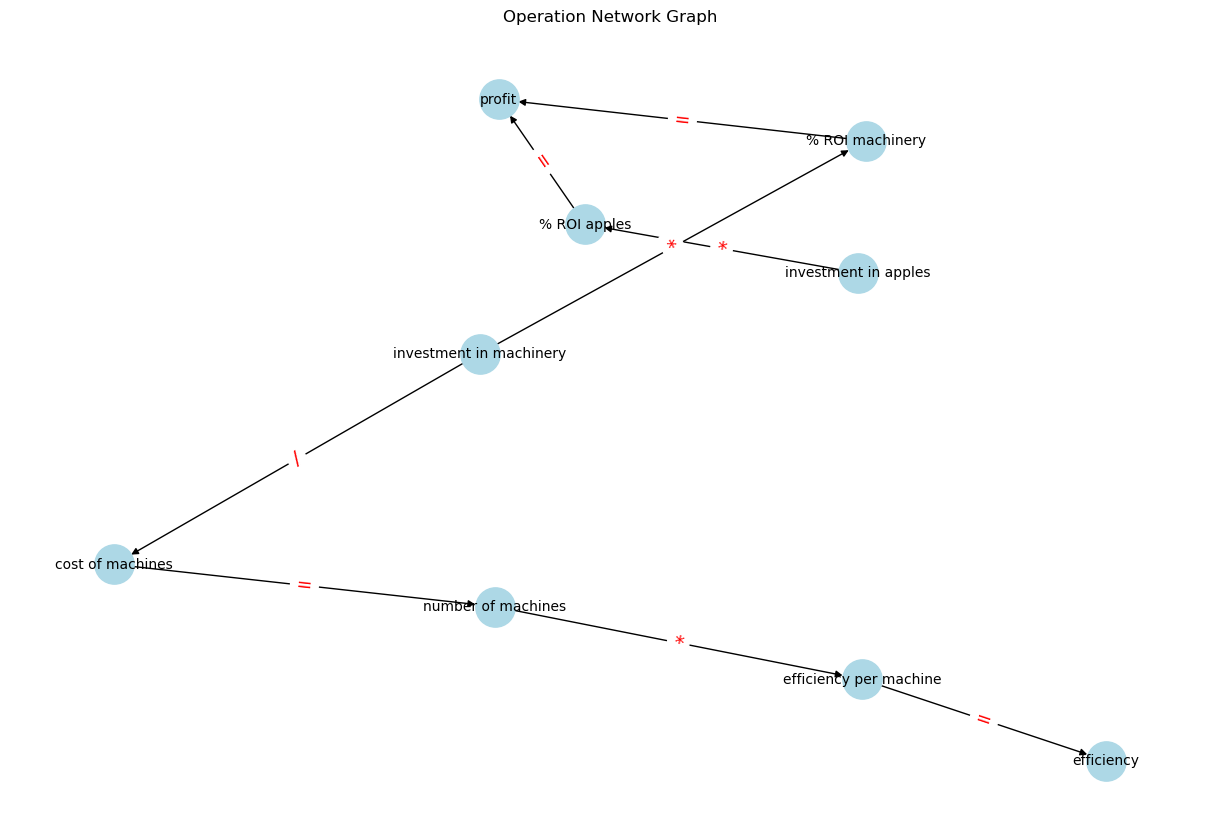

In [4]:
# Initialize a directed graph
G = nx.DiGraph()

# Iterate through the rows of the DataFrame to add nodes and edges
for index, row in data.iterrows():
    destination = row['destination']
    argument_1 = row['argument_1']
    argument_2 = row['argument_2']
    operator = row['operator']
    
    # Add nodes for destination, argument_1, and argument_2
    G.add_node(destination)
    G.add_node(argument_1)
    G.add_node(argument_2)
    
    # Add an edge from argument_1 to destination with the operator as the label
    if pd.isna(argument_1):
        G.add_edge(argument_2, destination, operator='squeezed')
    elif pd.isna(argument_2):
        G.add_edge(argument_1, destination, operator='squeezed')
    else:
        G.add_edge(argument_1, argument_2, operator=operator)
        # Later make function so that based on category, we make the edge to destination
        G.add_edge(argument_2, destination, operator='=')

# Define the layout for the graph (you can use different layouts)
pos = nx.spring_layout(G, seed=42)

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=800, node_color='lightblue', font_size=10, font_color='black')
edge_labels = nx.get_edge_attributes(G, 'operator')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=14, font_color='red')
plt.title('Operation Network Graph')
plt.show()


In [5]:
# Initialize a directed graph
G = nx.DiGraph()

input_dict = case.input_dict

# Iterate through the rows of the DataFrame to add nodes and edges
for index, row in data.iterrows():
    destination = row['destination']
    argument_1 = row['argument_1']
    argument_2 = row['argument_2']
    operator = row['operator']
    
    # Add nodes for destination, argument_1, and argument_2
    G.add_node(destination, color = category_color(destination))
    G.add_node(argument_1, color = category_color(argument_1))
    G.add_node(argument_2, color = category_color(argument_2))
    
    # Add an edge from argument_1 to destination with the operator as the label
    if pd.isna(argument_1):
        G.add_edge(argument_2, destination, label='squeezed', color='black')
    elif pd.isna(argument_2):
        G.add_edge(argument_1, destination, label='squeezed', color='black')
    else:
        G.add_edge(argument_1, argument_2, label=operator, color='black')
        # Later make function so that based on category, we make the edge to destination
        G.add_edge(argument_2, destination, label='=', color='black')

In [6]:
# Define the layout for the graph (you can use different layouts)
pos = nx.spectral_layout(G)

net = Network(notebook=True, cdn_resources='remote')
net.from_nx(G)
net.show_buttons()
net.show("example.html")

example.html


## For the Nyenrode Exercise case

In [12]:
# Read the CSV file
data = pd.read_csv('data/toy/csv/dependencies.csv')

path = Path.cwd() / 'data'
file_format = 'xlsx'
name = 'FinalTemplate'

case = TheResponsibleBusinessSimulator(path, file_format, name)
case.build()

data = pd.DataFrame({'argument_1': case.input_dict['argument_1'], 'operator': case.input_dict['operator'], 
              'argument_2': case.input_dict['argument_2'], 'destination': case.input_dict['destination']})

Creating 'FinalTemplate'
Hierarchy calculated in 4 iterations


In [13]:
# Initialize a directed graph
G = nx.DiGraph()

input_dict = case.input_dict

# Iterate through the rows of the DataFrame to add nodes and edges
for index, row in data.iterrows():
    destination = row['destination']
    argument_1 = row['argument_1']
    argument_2 = row['argument_2']
    operator = row['operator']
    
    # Add nodes for destination, argument_1, and argument_2
    G.add_node(destination, color = category_color(destination))
    G.add_node(argument_1, color = category_color(argument_1))
    G.add_node(argument_2, color = category_color(argument_2))
    
    # Add an edge from argument_1 to destination with the operator as the label
    if pd.isna(argument_1):
        G.add_edge(argument_2, destination, label='squeezed', color='black')
    elif pd.isna(argument_2):
        G.add_edge(argument_1, destination, label='squeezed', color='black')
    else:
        G.add_edge(argument_1, argument_2, label=operator, color='black')
        # Later make function so that based on category, we make the edge to destination
        G.add_edge(argument_2, destination, label='=', color='black')
        
# Define the layout for the graph (you can use different layouts)
pos = nx.spring_layout(G, seed=42)

net = Network(notebook=True, cdn_resources='remote')
net.from_nx(G)
net.show_buttons()
net.show("example.html")

example.html


## For the beerwiser case

In [9]:
# Read the CSV file
data = pd.read_csv('data/toy/csv/dependencies.csv')

path = Path.cwd() / 'data'
file_format = 'xlsx'
name = 'beerwiser'

case = TheResponsibleBusinessSimulator(path, file_format, name)
case.build()

data = pd.DataFrame({'argument_1': case.input_dict['argument_1'], 'operator': case.input_dict['operator'], 
              'argument_2': case.input_dict['argument_2'], 'destination': case.input_dict['destination']})
data

Creating 'beerwiser'
Hierarchy calculated in 5 iterations


,argument_1,operator,argument_2,destination
0,Invest in training of employees,squeezed *,NaN,Accidents reduction %
1,Invest in water recycling,squeezed *,NaN,Water use reduction % when effective
2,Invest in training of employees,/,# employees,Cost of training per employee
3,Water use reduction % when effective,*,Effectiveness water recycling,Water use reduction %
4,Current # accidents,*,Accidents reduction %,Accidents reduction
5,Water use reduction %,*,Current water use,Water use reduction
6,Accidents reduction,*,Cost of accident,Production cost reduction $
7,Current # accidents,-,Accidents reduction,New # accidents
8,Water use reduction,*,Water unit cost,Production cost reduction $
9,Current water use,-,Water use reduction,New water use


In [10]:
# Initialize a directed graph
G = nx.DiGraph()

input_dict = case.input_dict

# Iterate through the rows of the DataFrame to add nodes and edges
for index, row in data.iterrows():
    destination = row['destination']
    argument_1 = row['argument_1']
    argument_2 = row['argument_2']
    operator = row['operator']
    
    # Add nodes for destination, argument_1, and argument_2
    G.add_node(destination, color = category_color(destination))
    
    # Add an edge from argument_1 to destination with the operator as the label
    if pd.isnull(argument_1):
        print(argument_2, category_color(argument_2))
        G.add_node(argument_2, color = category_color(argument_2))
        G.add_edge(argument_2, destination, label=operator, color='black')
    elif pd.isnull(argument_2):
        print(argument_1, category_color(argument_1))
        G.add_node(argument_1, color = category_color(argument_1))
        G.add_edge(argument_1, destination, label=operator, color='black')
    else:
        G.add_node(argument_1, color = category_color(argument_1))
        G.add_node(argument_2, color = category_color(argument_2))
        G.add_edge(argument_1, argument_2, label=operator, color='black')
        # Later make function so that based on category, we make the edge to destination
        G.add_edge(argument_2, destination, label='=', color='black')
 

Invest in training of employees blue
Invest in water recycling blue


In [11]:
       
# Define the layout for the graph (you can use different layouts)
pos = nx.spring_layout(G, seed=42)

net = Network(notebook=True, cdn_resources='remote')
net.from_nx(G)
net.show_buttons()
net.show("example.html")

example.html
